No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


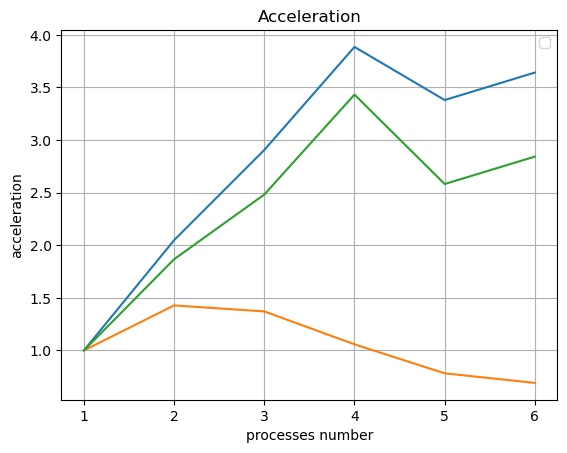

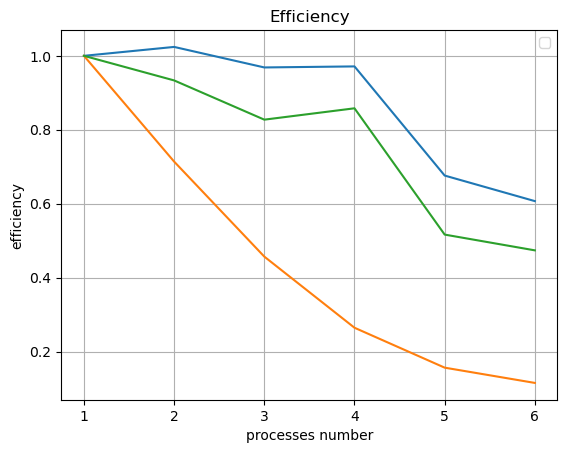

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import subprocess as sp

def run_et(nproc):
    cmd = ['wsl', './et_par', str(nproc)]
    return float(sp.check_output(cmd, shell=True).decode('cp866'))

def run_1(nproc):
    cmd = ['wsl', 'mpirun', '-np', str(nproc), './1_par']
    return float(sp.check_output(cmd, shell=True).decode('cp866'))

def run_2(nproc):
    cmd = ['wsl', './et_par', str(nproc)]
    return float(sp.check_output(cmd, shell=True).decode('cp866'))

nproc_max = 6
x = range(1, nproc_max + 1)

fig, ax_ac = plt.subplots()
ax_ac.grid()
ax_ac.legend()
ax_ac.set(xlabel='processes number', ylabel='acceleration', title='Acceleration')

fig, ax_ef = plt.subplots()
ax_ef.grid()
ax_ef.legend()
ax_ef.set(xlabel='processes number', ylabel='efficiency', title='Efficiency')

def plot(func, name):
    y = np.array([])
    for nproc in x:
        time = func(nproc)
        y = np.append(y, time)

    y = y[0] / y
    ax_ac.plot(x, y, label=name)

    y = y / x
    ax_ef.plot(x, y, label=name)

plot(run_et, 'etalon')
plot(run_1, '1')
plot(run_2, '2')